In [36]:
# Importing Libraries

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.spatial import distance # To calculate distances
import scipy.cluster.hierarchy as sch

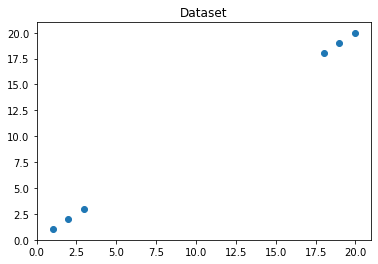

In [37]:
# Lets take an small example
x_axis = np.array([1,2,3,18,19,20])
y_axis = np.array([1,2,3,18,19,20])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()


Text(0, 0.5, 'Euclidean distance in the space with other variables')

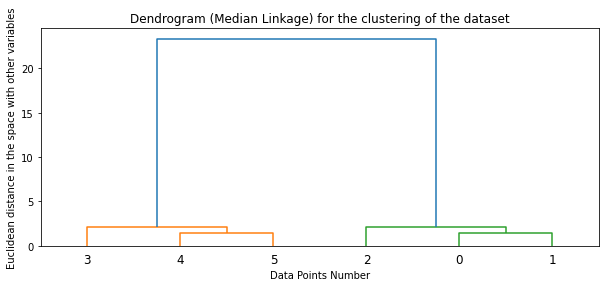

In [38]:

# Dendrogram (Median Linkage) 

Z = sch.linkage(data, method = 'median')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Median Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

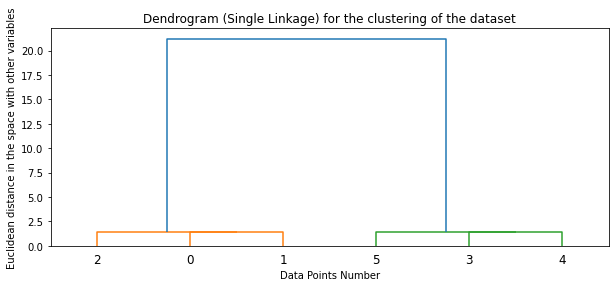

In [39]:
# Dendrogram (Single Linkage) 

Z = sch.linkage(data, method = 'single')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

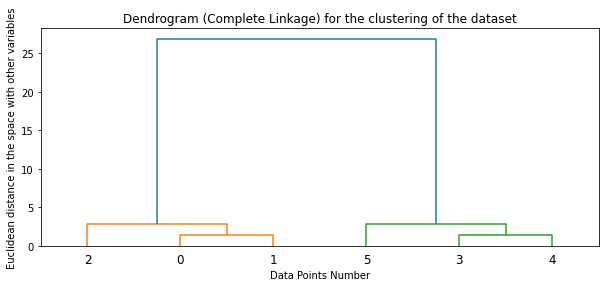

In [40]:

# Dendrogram (Complete Linkage) 

Z = sch.linkage(data, method = 'complete')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Complete Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

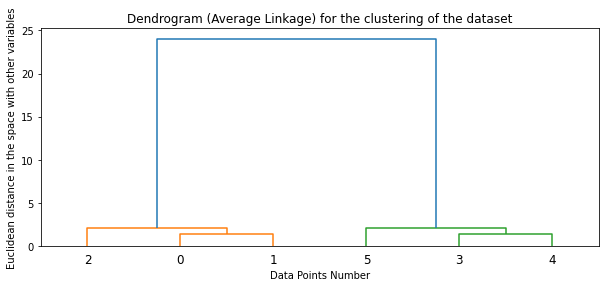

In [41]:

# Dendrogram (Average Linkage) 

Z = sch.linkage(data, method = 'average')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [42]:
# Building an Agglomerative Clustering Model : Initialise Model
# We analyse the above-created dendrogram 
# decide that we will be making 2 clusters for this dataset

cluster_H = AgglomerativeClustering(n_clusters=2,linkage= 'average')
# Model Fit
model_clt = cluster_H.fit(data)
print(model_clt)
print('\n')

data['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 2 :')
print(data['clusters'])
     

AgglomerativeClustering(linkage='average')


Clusters assigned to each datapoints, cluster = 2 :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int64


In [43]:

# Silhouette Score
data = pd.DataFrame({'x':x_axis, 'y':y_axis})
for k in range(2,6):# Maximum range should be 6, as it contains only 6 data points
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
  model_clt = cluster_H.fit(data)
  label = model_clt.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))
print('\n')
print('For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2')
     

For cluster= 2, Silhouette Coefficient is 0.9213643790849674
For cluster= 3, Silhouette Coefficient is 0.5428175766885445
For cluster= 4, Silhouette Coefficient is 0.16666666666666666
For cluster= 5, Silhouette Coefficient is 0.08333333333333333


For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2


In [45]:

# Lets take another example : IRIS DATASET
# Loading the Dataset

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:

# Preparing Data
# Here we have the target variable ‘Type’. 
# We need to remove the target variable, used to work in an unsupervised learning 
# The iloc function is used to get the features we require. 
# We also use .values function to get an array of the dataset. 
# Note : We transformed the dataset to an array so that we can plot the graphs of the clusters

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows

In [ ]:

# Now we will separate the target variable from the original dataset 
# And again convert it to an array by using numpy
iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)
print(iris_Y)
# Frequency count of the Output clusters
unique, counts = np.unique(iris_Y, return_counts=True)
freq_1 = dict(zip(unique, counts))
freq_1

In [ ]:

# Filtering Setosa

Setosa = iris_data['Type'] == 0
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print(Setosa.head())
print("Top 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print(Setosa_v2[Setosa_v2.columns[0:2]].head())
print("Last 6 Rows of Setosa")
print(Setosa_v2[Setosa_v2.columns[0:2]].tail())

In [ ]:

# Filtering Setosa for 2D Plot 

print("Setosa for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 0,0])
print("Y Axis Points")
print(iris_X[iris_Y == 0,1])
print('\n')
# For Setosa in Target Column i.e, iris_Y = 0 
# In other word it should range from (0,0) to (0,1)
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [ ]:

# Filtering Versicolour

Versi = iris_data['Type'] == 1
print("Filtering Versicolour, True means its Versicolour and False means Non Versicolour")
print(Versi.head())
print("Top 6 Rows of Versicolour")
Versi_v2 = iris_data[Versi]
print(Versi_v2[Versi_v2.columns[0:2]].head())
print("Last 6 Rows of Versicolour")
print(Versi_v2[Versi_v2.columns[0:2]].tail())
     

In [ ]:

# Filtering Versicolour for 2D Plot 

print("Versicolour for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 1,0])
print("Y Axis Points")
print(iris_X[iris_Y == 1,1])
print('\n')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [ ]:

# Filtering Virginica

Virginica = iris_data['Type'] == 2
print("Filtering Virginica, True means its Virginica and False means Non Virginica")
print(Virginica.head())
print("Top 6 Rows of Virginica")
Virginica_v2 = iris_data[Virginica]
print(Virginica_v2[Virginica_v2.columns[0:2]].head())
print("Last 6 Rows of Virginica")
print(Virginica_v2[Virginica_v2.columns[0:2]].tail())

In [ ]:

# Filtering Virginica for 2D Plot

print("Virginica for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 2,0])
print("Y Axis Points")
print(iris_X[iris_Y == 2,1])
print('\n')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [ ]:
# Visualise Classes all at once

# In this Iris dataset, we have three classes (0,1,2)
# We visualise these classes in a 2-D graph 
# This will help us in comparing the original classes with the clusters created 
# Plot the three type of flowers on a graph

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference : 
# We find that we have three classes with two types of Iris flowers overlapping each other

In [ ]:
# Plotting of Dendrogram

# We make use of dendrogram to decide the number of clusters required for our dataset
# A dendrogram is a tree diagram which illustrates the arrangement of clusters.
import scipy.cluster.hierarchy as sch

# Pick the features from the original dataset
# We don't need Target Column in Clustering
iris_X_1 = iris_data[['sepal length (cm)','sepal width (cm)',
                      'petal length (cm)','petal width (cm)']]
iris_X_1.head()

In [ ]:

# We finally plot a Dendrogram 
# which helps us in deciding what the threshold values should be for the clustering algorithm
# Basically, we decide the number of clusters by using this dendrogram.

Z = sch.linkage(iris_X_1, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [ ]:

# Single Linkage - Nearest Point

Z = sch.linkage(iris_X_1, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [ ]:

# Complete Linkage - Farthest Point 

Z = sch.linkage(iris_X_1, method = 'complete')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [ ]:

# Average Linkage - Average Distance between all points

Z = sch.linkage(iris_X_1, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [ ]:

# Building an Agglomerative Clustering Model
# Initialise Model
# We analyse the above-created dendrogram 
# decide that we will be making 3 clusters for this dataset

cluster_H = AgglomerativeClustering(n_clusters=3,linkage = 'average')

# Fitting Model
# After building Agglomerative clustering, we will fit our iris data set
# Note that only the independent variables from the Iris dataset 
# are taken into account for the purpose of clustering

model_clt = cluster_H.fit(iris_X_1)
model_clt

In [ ]:

# Predicting Output Class

print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

In [ ]:

# Visualizing Output

print('Original Cluster')
print(freq_1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print('Hierarchical Clustering Output Cluster')
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for 3 Clusters')
print(silhouette_score(iris_X,pred1))
print('\n')

# In the above output we got value labels: ‘0’, ‘1’  and ‘2’
# For a better understanding, we can visualize these clusters.

# We use the above-found class labels and visualise how the clusters have been formed.

plt.scatter(iris_X[pred1 == 0, 0], iris_X[pred1 == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred1 == 1, 0], iris_X[pred1 == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred1 == 2, 0], iris_X[pred1 == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference : 
# When compared to the original classes we find that the observations of the class label 
# "1" has been correctly formed into a separate well-defined cluster
# however, for the other two classes, clusters are not as correct. 
# This is mainly because, in the original dataset, these two class labels were overlapping each other 
# which makes it difficult for the clustering algorithm as it works best for clear neat separate observations. 
# Still, the clusters have been formed, more or less correctly

for k in range(2,10):
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
  model_clt = cluster_H.fit(iris_X)
  label = model_clt.labels_
  sil_coeff = silhouette_score(iris_X,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))
print('\n')
print('For Cluster = 2, it has highest Silhouette Value')
print('But according to Visualization and data, Number of Cluster is 3')

In [ ]:
## Bisecting K Means for Divisive Clustering 